# Clustering

This notebook contains clustering of gas stations only on statistical data derived from their prices.
These features have been created in the _make_clustering_features_ notebook. 
The clustering it self has been done using __kmeans__ and __gausian_mixture_models__ unsupervised methods.

The results have been made visible using _principal component analysis_. 

It could be shown that the _gmm_ method works best. The model was able to cluster Shell, Aral and others. 
The visualization of the clustering is in the notebook __plot_clustering__

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA 
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_pickle('./data/feature_matrix_over_year.pkl')

In [3]:
df_stations = pd.read_csv('./tankerkoenig-data/stations/stations.csv')

In [4]:
df_stations.name = df_stations.name.str.lower()
df_stations.name = df_stations.name.str.replace(' ','_')

nan_stations = df_stations[df_stations.brand.isna()]
bft_index = nan_stations[nan_stations.name.str.contains('bft')].index
df_stations.iloc[bft_index,2] = 'bft'

df_stations.brand = df_stations.brand.str.lower()
df_stations.brand = df_stations.brand.str.replace(' ','_')

# Normalizing the features


In [6]:
scaler = MinMaxScaler()
scaler.fit(df)
df_scaled = scaler.transform(df)

In [7]:
df_scaled.shape

(14852, 31)

# KMeans Clustering

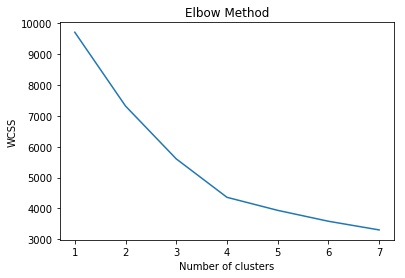

In [13]:
wcss = []
max_cluster = 8
for k in range(1, max_cluster):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=500, n_init=10, random_state=0)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, max_cluster), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [20]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(df_scaled)

In [21]:
df_joined = df.join(df_stations.set_index('uuid').loc[:, ['brand']], how='left' )

In [22]:
df_joined['kmeans_cluster'] =  pred_y.T

In [24]:
df_joined[df_joined.kmeans_cluster == 1].brand.value_counts()

avia                    177
freie_tankstelle        141
bft                     132
aral                    106
esso                     97
                       ... 
tankstelle                1
m1                        1
tankzentrum_lacher        1
unger_+_guthier_gmbh      1
tankstelle_brey           1
Name: brand, Length: 400, dtype: int64

In [25]:
pca = PCA(n_components = 3)
X2D = pca.fit_transform(df_scaled)

In [26]:
print(pca.explained_variance_ratio_)

[0.31121813 0.24823467 0.11720368]


In [27]:
sum(pca.explained_variance_ratio_)

0.6766564698269603

In [28]:
important_features = np.argsort(pca.components_[0,:])

In [29]:
df_joined.columns[important_features]

Index(['changes_e10', 'min_e10', 'changes_e5', 'n_peaks_e10', 'max_e10',
       'changes_diesel', 'mean_e10', 'median_e10', 'n_peaks_e5',
       'n_peaks_diesel', 'min_e5', 'min_diesel', 'max_e5', 'mean_e5',
       'median_e5', 'neighbors_5km', 'neighbors_3km', 'skewness_diesel',
       'latitude', 'skewness_e5', 'skewness_e10', 'max_diesel',
       'median_diesel', 'mean_diesel', 'var_e5', 'var_e10', 'var_diesel',
       'kurtosis_e10', 'longitude', 'kurtosis_e5', 'kurtosis_diesel'],
      dtype='object')

In [31]:
def Aral_test(row):
    if row == 'aral':
        return 1
    else:
        return 0
    
def Shell_test(row):
    if row == 'shell':
        return 1
    else:
        return 0
        
df_joined['isAral'] = df_joined.brand.apply(Aral_test)
df_joined['isShell'] = df_joined.brand.apply(Shell_test)

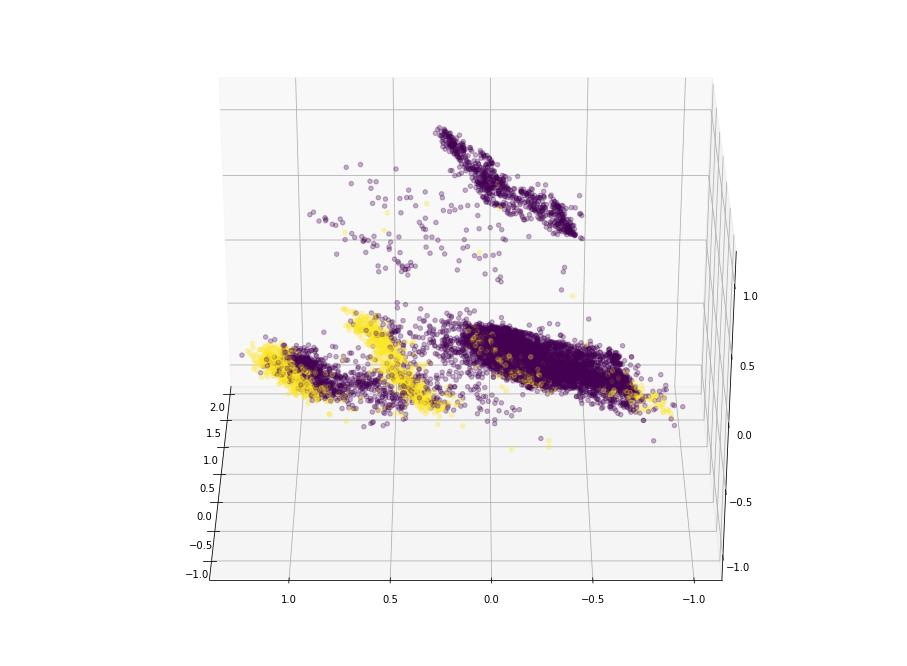

In [32]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs=X2D[:,0], ys=X2D[:,1], zs=X2D[:,2], c=df_joined.isAral, alpha=0.3)
ax.view_init(azim=180)


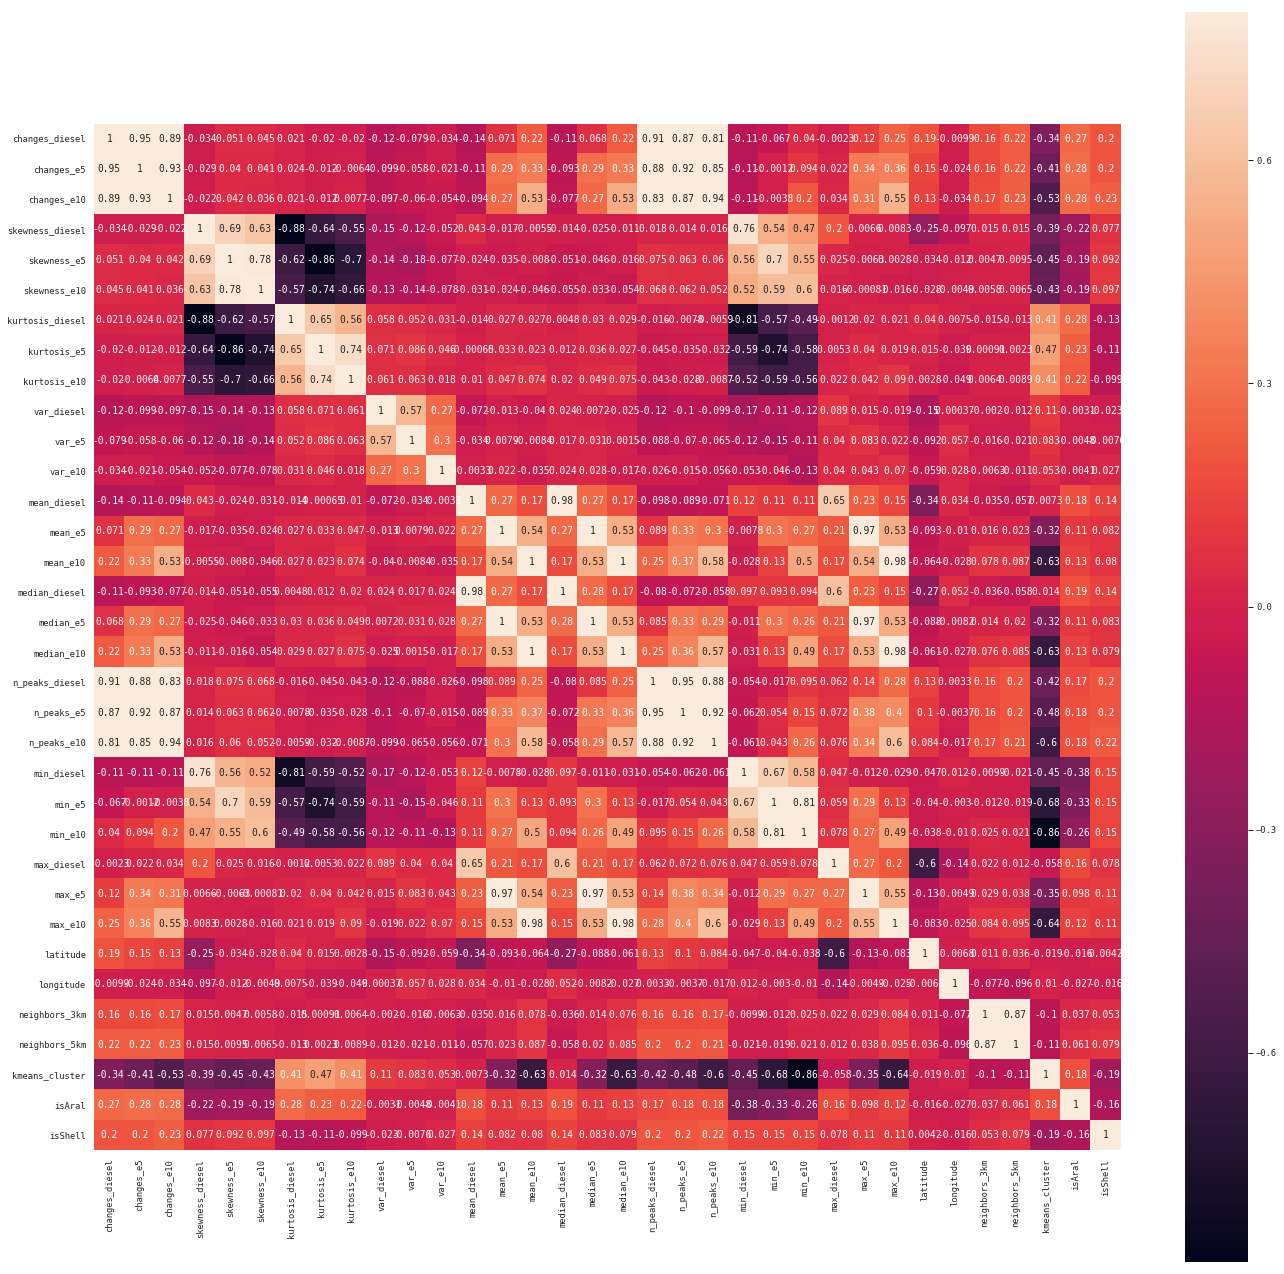

In [33]:
df_corr = df_joined
sns.set(context="paper", font="monospace")
corrmat = df_corr.corr()
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(23, 23))
# Generate a custom diverging colormap
# # Drawing the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True, annot=True);

In [34]:
df_joined[df_joined.brand == 'shell']

,changes_diesel,changes_e5,changes_e10,skewness_diesel,skewness_e5,skewness_e10,kurtosis_diesel,kurtosis_e5,kurtosis_e10,var_diesel,...,max_e5,max_e10,latitude,longitude,neighbors_3km,neighbors_5km,kmeans_cluster,brand,isAral,isShell
0006d4f6-a88d-473e-a8b1-b1f49b35eec0,3950.0,3894.0,4068.0,1.634173,0.257766,0.197278,4.107602,-0.362065,-0.382203,0.003740,...,1.679,1.659,50.471190,7.855065,5.0,7.0,0,shell,0,1
000e5864-eb6e-47f7-825f-9a655d83b0d0,5729.0,5670.0,6137.0,1.225780,0.320856,0.470355,2.616295,-0.587086,-0.429212,0.003214,...,1.689,1.669,50.324879,7.605549,4.0,6.0,0,shell,0,1
0018c07b-6aa8-475d-974b-f4e373621b2e,5590.0,5371.0,5817.0,0.419191,0.086964,0.176914,-0.110770,-0.692785,-0.613034,0.002682,...,1.679,1.659,52.140197,10.335751,5.0,8.0,0,shell,0,1
0047b529-113c-47bd-bd1a-84cbd68712aa,5479.0,5488.0,5874.0,0.934281,0.158475,0.264687,0.994261,-0.599932,-0.475842,0.003804,...,1.679,1.659,50.574906,8.712315,6.0,14.0,0,shell,0,1
00817d75-635d-4f2a-a556-4135ef42666e,6066.0,6830.0,7212.0,1.664674,0.305897,0.359016,3.401974,-0.563714,-0.444828,0.004437,...,1.679,1.659,49.348434,8.688446,7.0,13.0,0,shell,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ff22e024-d2cf-4136-ac43-a9a452905eac,5145.0,5048.0,5048.0,1.718528,0.227635,0.227635,3.068124,-0.590657,-0.590657,0.005391,...,1.679,1.659,48.937391,9.258705,6.0,8.0,0,shell,0,1
ff30285f-3039-47d9-8a2a-9b52099a3f05,5886.0,5734.0,6099.0,1.242869,0.309985,0.364801,2.089760,-0.713401,-0.642515,0.004755,...,1.689,1.669,49.033597,8.395254,5.0,20.0,0,shell,0,1
ff719585-52e4-40f3-a217-2e1b5a5c5633,2144.0,2245.0,2245.0,0.933682,0.264778,0.264778,1.944513,-0.572683,-0.572683,0.000928,...,1.799,1.779,49.269738,8.153410,6.0,9.0,1,shell,0,1
ff8d3b95-eb23-4903-aa2d-d085306ca907,5263.0,5236.0,5618.0,0.481172,0.175639,0.319038,-0.255710,-0.514232,-0.422915,0.003037,...,1.679,1.659,52.355627,9.753583,7.0,16.0,0,shell,0,1


## GaussianMixtureModels

In [36]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4).fit(df_scaled)
gmm_labels = gmm.predict(df_scaled)


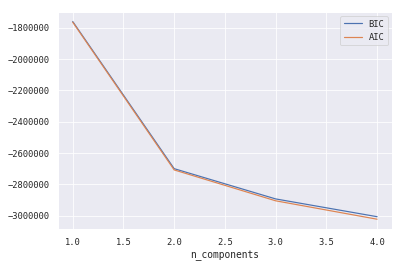

In [37]:
n_components = np.arange(1, 5)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(df_scaled)
          for n in n_components]

plt.plot(n_components, [m.bic(df_scaled) for m in models], label='BIC')
plt.plot(n_components, [m.aic(df_scaled) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');



In [38]:
gmm_labels.shape

(14852,)

In [39]:
df_joined['gmm_cluster'] = gmm_labels

In [40]:
df_joined

,changes_diesel,changes_e5,changes_e10,skewness_diesel,skewness_e5,skewness_e10,kurtosis_diesel,kurtosis_e5,kurtosis_e10,var_diesel,...,max_e10,latitude,longitude,neighbors_3km,neighbors_5km,kmeans_cluster,brand,isAral,isShell,gmm_cluster
00006210-0037-4444-8888-acdc00006210,4705.0,4803.0,4774.0,-1.817817,-3.146691,-3.072491,62.660141,61.539534,59.597531,0.004990,...,1.619,48.555683,10.850848,4.0,5.0,2,beducker,0,0,3
00016899-3247-4444-8888-acdc00000007,2871.0,2784.0,2788.0,1.714685,0.334382,0.333061,4.012224,-0.197960,-0.203483,0.003830,...,1.659,49.661587,10.920224,0.0,3.0,1,bft_pickelmann,0,0,1
00041414-208c-4444-8888-acdc00000414,419.0,430.0,0.0,-6.888683,-6.175341,0.000000,58.131150,39.550679,-3.000000,0.020105,...,0.000,51.169189,6.948950,7.0,14.0,3,NaN,0,0,2
00041450-0002-4444-8888-acdc00000002,180.0,176.0,181.0,1.835378,0.306207,-6.659782,2.587737,-0.672192,72.044662,0.004862,...,1.558,48.121895,11.451392,2.0,16.0,1,NaN,0,0,0
00047369-0001-4444-8888-acdc00000001,371.0,440.0,438.0,-8.004936,-5.534799,-5.514452,84.381312,33.474356,33.308699,0.014608,...,1.599,48.241470,12.520820,6.0,7.0,2,NaN,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fff05f62-7e1e-42e4-8d71-6e2c9c963a8b,2834.0,2577.0,2577.0,0.440446,-0.013002,-0.013002,-0.270087,-1.283175,-1.283175,0.004661,...,1.769,51.499490,8.983397,2.0,2.0,1,total,0,0,0
fff2435f-84de-4f41-b62b-9f6810169f45,1889.0,1985.0,0.0,0.861832,0.195566,0.000000,1.503967,-0.769527,-3.000000,0.002882,...,0.000,53.568930,7.288230,0.0,3.0,3,freie_tankstelle,0,0,2
fff261ef-ff00-4d2b-8669-ec2f7c57cd93,5486.0,5303.0,5303.0,0.922845,0.034749,0.034002,0.671088,-1.113226,-1.114091,0.003059,...,1.609,51.125200,14.683700,1.0,2.0,0,avia,0,0,1
fffb0617-e77d-48dd-838c-f43a945f6f70,6723.0,6696.0,6696.0,0.987645,0.244564,0.244564,1.061596,-0.551191,-0.551191,0.003653,...,1.649,51.606370,7.049170,8.0,12.0,0,westfalen,0,0,1


In [41]:
df_joined[df_joined.isAral == 1].gmm_cluster.value_counts()

3    1409
1     768
0     114
2       9
Name: gmm_cluster, dtype: int64

In [42]:
df_joined[df_joined.isAral == 1].kmeans_cluster.value_counts()

0    1123
2    1063
1     106
3       8
Name: kmeans_cluster, dtype: int64

In [43]:
df_joined[df_joined.isShell == 1].gmm_cluster.value_counts()

1    1526
0     200
2      23
3      15
Name: gmm_cluster, dtype: int64

In [44]:
df_joined[df_joined.isShell == 1].kmeans_cluster.value_counts()

0    1661
1      55
2      25
3      23
Name: kmeans_cluster, dtype: int64

In [45]:
df_joined.to_pickle('./data/clustering_data.pkl')